In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib

In [2]:
# descobrindo os estados com mais avistamentos
df_original = pd.read_csv("../Sprint 1/ovnis.csv")
top_states = df_original.State.value_counts().head(4)
print(top_states)

CA    11470
FL     5618
WA     4925
TX     4181
Name: State, dtype: int64


In [3]:
# descobrindo os formatos mais populares
top_shapes = df_original.Shape.value_counts().head(4)
print(top_shapes)

Light       21338
Circle      10654
Triangle     9321
Fireball     8325
Name: Shape, dtype: int64


In [4]:
# filtrando dataframe apenas com os formatos e estados mais populares
df_chart = df_original.loc[df_original.State.isin(list(top_states.index))]
df_chart = df_chart.loc[df_chart.Shape.isin(list(top_shapes.index))]
df_chart.head()

,Date / Time,City,State,Country,Shape,Duration,Summary,Posted,Images
2,9/1/97 22:30,Carlsbad,CA,USA,Light,3-5 min,Round orb of light seen in back yard.between a...,12/12/09,NaN
8,9/6/97 04:47,Covington,WA,USA,Triangle,15 min,Triangle shaped with six lights underneath. On...,1/28/99,NaN
13,9/10/97 19:00,Alta Loma,CA,USA,Circle,60 minutes +,Very bright circular object about 1500 to 2000...,1/28/99,NaN
42,9/20/97 22:15,Poway,CA,USA,Triangle,22 min,"lights in the shape of a ""V"" were observed by ...",2/16/99,NaN
58,9/28/97 23:15,San Francisco,CA,USA,Triangle,12-15s,flying-wing shape outlined by 12-14 lights. Ap...,7/5/99,NaN


In [5]:
# agrupando pelos valores que interessam para a plotagem do gráfico de barras
df_chart = df_chart.groupby(['State','Shape']).size().reset_index(name='Views')
df_chart

,State,Shape,Views
0,CA,Circle,1184
1,CA,Fireball,995
2,CA,Light,2457
3,CA,Triangle,983
4,FL,Circle,650
5,FL,Fireball,630
6,FL,Light,1078
7,FL,Triangle,472
8,TX,Circle,389
9,TX,Fireball,262


<AxesSubplot:xlabel='State'>

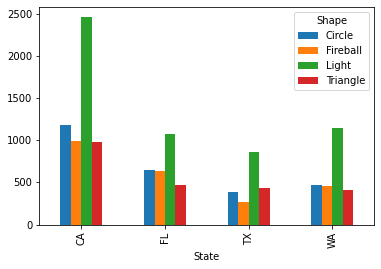

In [6]:
# gráfico de barras
df_chart.pivot('State', 'Shape', 'Views').plot(kind='bar')

<AxesSubplot:xlabel='State'>

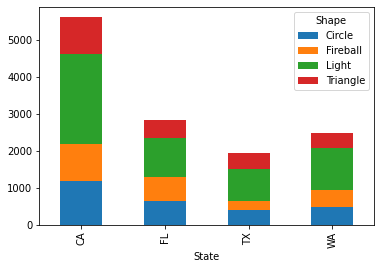

In [7]:
# gráfico de barras empilhadas
df_chart.pivot('State', 'Shape', 'Views').plot(kind='bar', stacked=True)